<a href="https://colab.research.google.com/github/arifsl65/AI/blob/main/cuda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

print("CUDA available:", torch.cuda.is_available())

# Check GPU info
if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))
    print("Current GPU:", torch.cuda.current_device())
    print("GPU Count:", torch.cuda.device_count())

CUDA available: True
GPU Name: Tesla T4
Current GPU: 0
GPU Count: 1


In [ ]:
import torch
import time

# Create large matrices
size = 5000
a = torch.randn(size, size)
b = torch.randn(size, size)

# CPU computation
start_time = time.time()
cpu_result = torch.matmul(a, b)
cpu_time = time.time() - start_time
print(f"CPU Time: {cpu_time:.2f} seconds")

# GPU computation
if torch.cuda.is_available():
    # Move matrices to GPU
    a_gpu = a.cuda()
    b_gpu = b.cuda()

    # Warm up GPU
    torch.matmul(a_gpu, b_gpu)
    torch.cuda.synchronize()

    # Measure GPU time
    start_time = time.time()
    gpu_result = torch.matmul(a_gpu, b_gpu)
    torch.cuda.synchronize()
    gpu_time = time.time() - start_time
    print(f"GPU Time: {gpu_time:.2f} seconds")
    print(f"GPU is {cpu_time/gpu_time:.1f}x faster")


CPU Time: 4.30 seconds
GPU Time: 0.09 seconds
GPU is 49.0x faster


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Check if we're still on GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.layers = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        return self.layers(x)

# Load and preprocess MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Download training data
train_dataset = datasets.MNIST('data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Create the model and move it to GPU
model = SimpleNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        # Move data to GPU
        data, target = data.to(device), target.to(device)

        # Forward pass
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        _, predicted = output.max(1)
        total += target.size(0)
        correct += predicted.eq(target).sum().item()

        running_loss += loss.item()

        if batch_idx % 100 == 99:    # Print every 100 batches
            print(f'Epoch: {epoch + 1}, Batch: {batch_idx + 1}, Loss: {running_loss / 100:.3f}, Accuracy: {100. * correct / total:.2f}%')
            running_loss = 0.0
            correct = 0
            total = 0

print('Training finished!')

# Test the model on a single example
test_dataset = datasets.MNIST('data', train=False, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)
data, target = next(iter(test_loader))
data = data.to(device)

model.eval()
with torch.no_grad():
    output = model(data)
    predicted = output.argmax().item()

print(f"\nPredicted digit: {predicted}")

Using device: cuda
Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:11<00:00, 898kB/s] 


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 134kB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.27MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.44MB/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Epoch: 1, Batch: 100, Loss: 0.709, Accuracy: 79.94%
Epoch: 1, Batch: 200, Loss: 0.348, Accuracy: 89.77%
Epoch: 1, Batch: 300, Loss: 0.276, Accuracy: 91.83%
Epoch: 1, Batch: 400, Loss: 0.240, Accuracy: 92.73%
Epoch: 1, Batch: 500, Loss: 0.219, Accuracy: 93.30%
Epoch: 1, Batch: 600, Loss: 0.182, Accuracy: 94.55%
Epoch: 1, Batch: 700, Loss: 0.190, Accuracy: 94.23%
Epoch: 1, Batch: 800, Loss: 0.159, Accuracy: 95.08%
Epoch: 1, Batch: 900, Loss: 0.146, Accuracy: 95.53%
Epoch: 2, Batch: 100, Loss: 0.125, Accuracy: 96.02%
Epoch: 2, Batch: 200, Loss: 0.125, Accuracy: 96.12%
Epoch: 2, Batch: 300, Loss: 0.121, Accuracy: 96.19%
Epoch: 2, Batch: 400, Loss: 0.117, Accuracy: 96.42%
Epoch: 2, Batch: 500, Loss: 0.120, Accuracy: 96.25%
Epoch: 2, Batch: 600, Loss: 0.112, Accuracy: 96.70%
Epoch: 2, Batch: 700, Loss: 0.105, Accuracy: 96.61%
Epoch: 2, Batch: 800, Loss: 0.103, Accuracy: 96.59%
Epoch: 2, Batch: 900, Loss: 0.097, Accuracy: 

Saving fyPhv.jpg to fyPhv.jpg
Predicted digit: 7


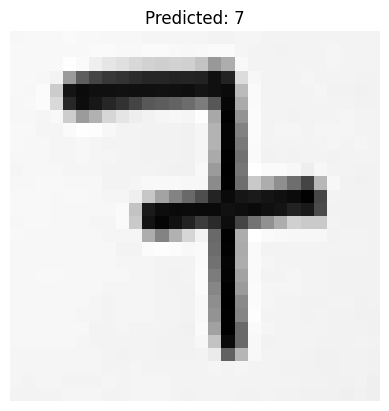

In [ ]:
from google.colab import files
from PIL import Image
import io

def predict_uploaded_image():
    # Upload image through Colab
    uploaded = files.upload()

    # Get the uploaded image
    image_name = next(iter(uploaded))
    image = Image.open(io.BytesIO(uploaded[image_name])).convert('L')  # Convert to grayscale
    image = image.resize((28, 28))

    # Transform image
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])

    # Prepare image for model
    img_tensor = transform(image).unsqueeze(0).to(device)

    # Get prediction
    model.eval()
    with torch.no_grad():
        output = model(img_tensor)
        predicted = output.argmax().item()

    print(f"Predicted digit: {predicted}")

    # Display the image
    import matplotlib.pyplot as plt
    plt.imshow(image, cmap='gray')
    plt.title(f'Predicted: {predicted}')
    plt.axis('off')
    plt.show()

# Run the prediction
predict_uploaded_image()